In [1]:
import csv
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from numpy.linalg import inv
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import accuracy_score
from sklearn.gaussian_process import GaussianProcessClassifier

In [2]:
class data_objects:
    def __init__(self,clip_no,stime,etime,weights_data,label):
        self.clip_no = clip_no
        self.stime = stime
        self.etime = etime
        self.weights_data = weights_data
        self.label = label

In [3]:
total_data_objects = []
with open("E:\\Study\\Sem Project\\Data\\weight_motion_vector_data.csv",'r') as file:
    reader = csv.reader(file)
    for row in reader:
        #from csv file all items will be read as strings, so we have to convert to int if neccesary
        total_data_objects.append(data_objects(row[0],row[1],row[2],np.asarray(list(map(float,row[4:]))),int(row[3])))

In [4]:
#printing objects value.
print("total no of objects",len(total_data_objects))
for i in range(len(total_data_objects)):
    print("clip no=",total_data_objects[i].clip_no)
    print("start time=",total_data_objects[i].stime)
    print("end time=",total_data_objects[i].etime)
    print("weights =",total_data_objects[i].weights_data)
    print("label = ",total_data_objects[i].label,"\n")

total no of objects 1327
clip no= 1
start time= 0:00:00
end time= 0:00:02
weights = [0.23775831 0.21021411 0.23205344 ... 0.23086858 0.24774176 0.06312307]
label =  -1 

clip no= 2
start time= 0:00:02
end time= 0:00:04
weights = [0.23794439 0.21014059 0.23198968 ... 0.23168734 0.25006667 0.06248911]
label =  -1 

clip no= 3
start time= 0:00:04
end time= 0:00:06
weights = [0.23807687 0.21008745 0.23194458 ... 0.23159105 0.24978963 0.0625677 ]
label =  -1 

clip no= 4
start time= 0:00:06
end time= 0:00:08
weights = [0.23800665 0.21011415 0.23196906 ... 0.23087671 0.24815442 0.06269858]
label =  -1 

clip no= 5
start time= 0:00:08
end time= 0:00:10
weights = [0.23781919 0.21018927 0.23203291 ... 0.23163502 0.24996282 0.06248138]
label =  -1 

clip no= 6
start time= 0:00:10
end time= 0:00:12
weights = [0.23796546 0.21013004 0.23198338 ... 0.23159593 0.2499     0.06246012]
label =  -1 

clip no= 7
start time= 0:00:12
end time= 0:00:14
weights = [0.23802921 0.21010537 0.23196127 ... 0.230860

label =  1 

clip no= 89
start time= 0:02:56
end time= 0:02:58
weights = [0.23795679 0.21013355 0.23198631 ... 0.2312375  0.24895744 0.06265757]
label =  1 

clip no= 90
start time= 0:02:58
end time= 0:03:00
weights = [0.23787171 0.21016797 0.23201513 ... 0.23160146 0.24984412 0.06253317]
label =  1 

clip no= 91
start time= 0:03:00
end time= 0:03:02
weights = [0.23799179 0.21011961 0.23197435 ... 0.23151705 0.24963351 0.06256731]
label =  1 

clip no= 92
start time= 0:03:02
end time= 0:03:04
weights = [0.23795809 0.21013163 0.2319864  ... 0.23123224 0.24895836 0.0626447 ]
label =  1 

clip no= 93
start time= 0:03:04
end time= 0:03:06
weights = [0.23791561 0.21015106 0.23199992 ... 0.23120077 0.24888173 0.06265563]
label =  1 

clip no= 94
start time= 0:03:06
end time= 0:03:08
weights = [0.23780946 0.2101922  0.23203659 ... 0.23108253 0.24861406 0.06267355]
label =  1 

clip no= 95
start time= 0:03:08
end time= 0:03:10
weights = [0.23794632 0.21014017 0.23198886 ... 0.23126757 0.249050

label =  -1 

clip no= 180
start time= 0:05:58
end time= 0:06:00
weights = [0.23799686 0.21011868 0.23197216 ... 0.23174143 0.25020117 0.06246804]
label =  -1 

clip no= 181
start time= 0:06:00
end time= 0:06:02
weights = [0.23802337 0.21011017 0.23196226 ... 0.23180036 0.25032258 0.06247213]
label =  -1 

clip no= 182
start time= 0:06:02
end time= 0:06:04
weights = [0.23795447 0.2101337  0.2319874  ... 0.23139681 0.24902162 0.06294408]
label =  -1 

clip no= 183
start time= 0:06:04
end time= 0:06:06
weights = [0.2380542  0.21009767 0.2319518  ... 0.23108517 0.24859925 0.06269613]
label =  -1 

clip no= 184
start time= 0:06:06
end time= 0:06:08
weights = [0.23808327 0.2100849  0.23194236 ... 0.23176759 0.25025228 0.06247287]
label =  -1 

clip no= 185
start time= 0:06:08
end time= 0:06:10
weights = [0.23795721 0.21013574 0.23198517 ... 0.23172905 0.25014642 0.0624992 ]
label =  -1 

clip no= 186
start time= 0:06:10
end time= 0:06:12
weights = [0.2379643  0.21013002 0.23198396 ... 0.231

label =  -1 

clip no= 313
start time= 0:10:24
end time= 0:10:26
weights = [0.23794517 0.21013975 0.23198961 ... 0.23171355 0.25012314 0.06248854]
label =  -1 

clip no= 314
start time= 0:10:26
end time= 0:10:28
weights = [0.23798808 0.21012226 0.23197514 ... 0.23170233 0.2500954  0.0624928 ]
label =  -1 

clip no= 315
start time= 0:10:28
end time= 0:10:30
weights = [0.23803057 0.21010685 0.23195997 ... 0.23164953 0.24998175 0.06249467]
label =  -1 

clip no= 316
start time= 0:10:30
end time= 0:10:32
weights = [0.23802419 0.21010663 0.23196334 ... 0.23105115 0.24867038 0.06254024]
label =  1 

clip no= 317
start time= 0:10:32
end time= 0:10:34
weights = [0.23792118 0.21015045 0.23199734 ... 0.23160353 0.2499118  0.0624647 ]
label =  1 

clip no= 318
start time= 0:10:34
end time= 0:10:36
weights = [0.23803821 0.21010141 0.23195834 ... 0.23165628 0.24998626 0.06250507]
label =  1 

clip no= 319
start time= 0:10:36
end time= 0:10:38
weights = [0.23792677 0.21014507 0.23199673 ... 0.231838

label =  -1 

clip no= 498
start time= 0:16:34
end time= 0:16:36
weights = [0.23796999 0.21012747 0.23198211 ... 0.2318297  0.25039861 0.06245724]
label =  1 

clip no= 499
start time= 0:16:36
end time= 0:16:38
weights = [0.23796242 0.21013191 0.23198409 ... 0.23170835 0.25012839 0.06247078]
label =  1 

clip no= 500
start time= 0:16:38
end time= 0:16:40
weights = [0.23798065 0.21012333 0.23197846 ... 0.23084818 0.24811125 0.06267976]
label =  1 

clip no= 501
start time= 0:16:40
end time= 0:16:42
weights = [0.23792571 0.21014681 0.23199652 ... 0.23083889 0.24813271 0.06263499]
label =  1 

clip no= 502
start time= 0:16:42
end time= 0:16:44
weights = [0.23810659 0.2100745  0.23193485 ... 0.23177713 0.25028628 0.06245808]
label =  -1 

clip no= 503
start time= 0:16:44
end time= 0:16:46
weights = [0.2379528  0.21013558 0.23198748 ... 0.23181488 0.25036711 0.0624573 ]
label =  -1 

clip no= 504
start time= 0:16:46
end time= 0:16:48
weights = [0.23799759 0.21011613 0.23197284 ... 0.2318106

weights = [0.23795244 0.21013476 0.23198803 ... 0.23169164 0.25006542 0.06250064]
label =  -1 

clip no= 622
start time= 0:20:42
end time= 0:20:44
weights = [0.23792143 0.2101467  0.23199879 ... 0.23183681 0.25041318 0.06245781]
label =  -1 

clip no= 623
start time= 0:20:44
end time= 0:20:46
weights = [0.23796387 0.21013001 0.23198418 ... 0.23177366 0.25027856 0.06245846]
label =  -1 

clip no= 624
start time= 0:20:46
end time= 0:20:48
weights = [0.23802982 0.2101046  0.23196131 ... 0.23142305 0.24950376 0.06249206]
label =  -1 

clip no= 625
start time= 0:20:48
end time= 0:20:50
weights = [0.23803194 0.21010369 0.23196058 ... 0.23165429 0.24992494 0.06256471]
label =  -1 

clip no= 626
start time= 0:20:50
end time= 0:20:52
weights = [0.23795052 0.21013637 0.2319883  ... 0.2316272  0.24991547 0.06251404]
label =  -1 

clip no= 627
start time= 0:20:52
end time= 0:20:54
weights = [0.23813127 0.21006508 0.23192625 ... 0.2309389  0.24835585 0.06262332]
label =  -1 

clip no= 628
start tim

weights = [0.2379978  0.21011791 0.23197199 ... 0.23040445 0.24671963 0.0631668 ]
label =  -1 

clip no= 680
start time= 0:22:38
end time= 0:22:40
weights = [0.23797026 0.21012844 0.23198162 ... 0.23040317 0.24690753 0.06296322]
label =  -1 

clip no= 681
start time= 0:22:40
end time= 0:22:42
weights = [0.2379387  0.21014008 0.23199274 ... 0.23022126 0.2465063  0.06298274]
label =  -1 

clip no= 682
start time= 0:22:42
end time= 0:22:44
weights = [0.23807837 0.21008766 0.23194374 ... 0.2316359  0.24992846 0.06252129]
label =  -1 

clip no= 683
start time= 0:22:44
end time= 0:22:46
weights = [0.23805644 0.21009296 0.23195261 ... 0.23169529 0.25007808 0.06249551]
label =  -1 

clip no= 684
start time= 0:22:46
end time= 0:22:48
weights = [0.23802532 0.21010554 0.2319632  ... 0.23174424 0.25019291 0.06248344]
label =  -1 

clip no= 685
start time= 0:22:48
end time= 0:22:50
weights = [0.23802601 0.21010588 0.23196273 ... 0.2308412  0.24797842 0.06280685]
label =  -1 

clip no= 686
start tim

label =  1 

clip no= 816
start time= 0:27:10
end time= 0:27:12
weights = [0.23814565 0.21006113 0.2319206  ... 0.23125328 0.24904978 0.06259455]
label =  1 

clip no= 817
start time= 0:27:12
end time= 0:27:14
weights = [0.23803855 0.21010308 0.23195753 ... 0.23058969 0.24746424 0.06278783]
label =  1 

clip no= 818
start time= 0:27:14
end time= 0:27:16
weights = [0.23804022 0.2101016  0.23195729 ... 0.231592   0.24982275 0.06253481]
label =  -1 

clip no= 819
start time= 0:27:16
end time= 0:27:18
weights = [0.23806641 0.21009164 0.23194815 ... 0.23073712 0.24778073 0.062783  ]
label =  -1 

clip no= 820
start time= 0:27:18
end time= 0:27:20
weights = [0.23805591 0.21009736 0.23195109 ... 0.23145688 0.24953023 0.06254002]
label =  -1 

clip no= 821
start time= 0:27:20
end time= 0:27:22
weights = [0.23810096 0.21007641 0.23193689 ... 0.23048134 0.24714325 0.06288812]
label =  -1 

clip no= 822
start time= 0:27:22
end time= 0:27:24
weights = [0.23801021 0.21011107 0.23196855 ... 0.230683

weights = [0.23804848 0.21009688 0.23195504 ... 0.23166704 0.25004798 0.06246306]
label =  -1 

clip no= 949
start time= 0:31:36
end time= 0:31:38
weights = [0.23797219 0.21012925 0.23198031 ... 0.2317996  0.25033247 0.06245959]
label =  -1 

clip no= 950
start time= 0:31:38
end time= 0:31:40
weights = [0.23795587 0.21013357 0.23198678 ... 0.23170596 0.25013137 0.06246224]
label =  -1 

clip no= 951
start time= 0:31:40
end time= 0:31:42
weights = [0.23797494 0.21012796 0.23197943 ... 0.23105301 0.24863724 0.06258131]
label =  -1 

clip no= 952
start time= 0:31:42
end time= 0:31:44
weights = [0.23797821 0.21012463 0.23197912 ... 0.23125558 0.24901746 0.06263199]
label =  -1 

clip no= 953
start time= 0:31:44
end time= 0:31:46
weights = [0.23798594 0.21012348 0.2319757  ... 0.23144165 0.24950655 0.06253087]
label =  -1 

clip no= 954
start time= 0:31:46
end time= 0:31:48
weights = [0.23797655 0.21012577 0.23197952 ... 0.23180035 0.2503252  0.06246911]
label =  -1 

clip no= 955
start tim

clip no= 1043
start time= 0:34:44
end time= 0:34:46
weights = [0.23786709 0.2101687  0.23201717 ... 0.23184063 0.25042188 0.06245701]
label =  -1 

clip no= 1044
start time= 0:34:46
end time= 0:34:48
weights = [0.23798521 0.21012165 0.23197684 ... 0.23185036 0.25044256 0.06245713]
label =  -1 

clip no= 1045
start time= 0:34:48
end time= 0:34:50
weights = [0.23795059 0.21014069 0.23198651 ... 0.23184423 0.25042942 0.06245722]
label =  -1 

clip no= 1046
start time= 0:34:50
end time= 0:34:52
weights = [0.23795114 0.21013683 0.2319878  ... 0.23185787 0.25045878 0.06245682]
label =  -1 

clip no= 1047
start time= 0:34:52
end time= 0:34:54
weights = [0.23802273 0.21010932 0.23196295 ... 0.23184857 0.25043878 0.06245712]
label =  -1 

clip no= 1048
start time= 0:34:54
end time= 0:34:56
weights = [0.23804575 0.21009775 0.23195605 ... 0.23184142 0.2504234  0.06245728]
label =  -1 

clip no= 1049
start time= 0:34:56
end time= 0:34:58
weights = [0.23803143 0.21010473 0.23196043 ... 0.23155636 0

end time= 0:39:18
weights = [0.23798078 0.21012622 0.23197719 ... 0.2312233  0.24863358 0.06298023]
label =  -1 

clip no= 1180
start time= 0:39:18
end time= 0:39:20
weights = [0.23798615 0.21012135 0.23197649 ... 0.23050942 0.2470376  0.06307085]
label =  -1 

clip no= 1181
start time= 0:39:20
end time= 0:39:22
weights = [0.23800831 0.21011426 0.23196818 ... 0.2302212  0.24612074 0.06339949]
label =  -1 

clip no= 1182
start time= 0:39:22
end time= 0:39:24
weights = [0.23796272 0.21013469 0.23198284 ... 0.23096615 0.24810424 0.06296019]
label =  -1 

clip no= 1183
start time= 0:39:24
end time= 0:39:26
weights = [0.23799676 0.21011727 0.23197281 ... 0.23037095 0.24663244 0.06318963]
label =  -1 

clip no= 1184
start time= 0:39:26
end time= 0:39:28
weights = [0.23800284 0.2101153  0.23197052 ... 0.23166284 0.25003871 0.06246341]
label =  -1 

clip no= 1185
start time= 0:39:28
end time= 0:39:30
weights = [0.23804963 0.21009788 0.23195405 ... 0.23132463 0.24923636 0.06255545]
label =  -1 

weights = [0.23801708 0.21010977 0.23196562 ... 0.23048116 0.24708436 0.06295559]
label =  -1 

clip no= 1316
start time= 0:43:50
end time= 0:43:52
weights = [0.23798981 0.21012035 0.23197502 ... 0.23157363 0.24985304 0.0624598 ]
label =  -1 

clip no= 1317
start time= 0:43:52
end time= 0:43:54
weights = [0.23810729 0.21007578 0.23193398 ... 0.23181297 0.25036281 0.06245746]
label =  -1 

clip no= 1318
start time= 0:43:54
end time= 0:43:56
weights = [0.23804474 0.21009985 0.23195572 ... 0.23156576 0.24978435 0.062516  ]
label =  -1 

clip no= 1319
start time= 0:43:56
end time= 0:43:58
weights = [0.23802988 0.21010427 0.2319614  ... 0.23148255 0.24959406 0.06253041]
label =  -1 

clip no= 1320
start time= 0:43:58
end time= 0:44:00
weights = [0.23803072 0.21010374 0.23196119 ... 0.23178692 0.2503072  0.06245781]
label =  -1 

clip no= 1321
start time= 0:44:00
end time= 0:44:02
weights = [0.23808432 0.21008383 0.2319423  ... 0.23183489 0.25040984 0.06245691]
label =  -1 

clip no= 1322
st

In [5]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [12]:
#dividing the total dataset into 60% training and 40% test
total_no = len(total_data_objects)
print("total objects=",total_no)
train_no=round(0.6*total_no)
print("train objects=",train_no)
test_no=round(0.4*total_no)
print("test objects=",test_no)

X_train=[]
X_test=[]
Y_train=[]
Y_test=[]

np.random.shuffle(total_data_objects)
for i in range(train_no):
    X_train.append(total_data_objects[i].weights_data)
    Y_train.append(total_data_objects[i].label)
for i in range(train_no,total_no):
    X_test.append(total_data_objects[i].weights_data)
    Y_test.append(total_data_objects[i].label)

X_test=np.asarray(X_test)
X_train=np.asarray(X_train)
#print("X_test",X_test)
#print("X_train",X_train)    

Y_test=np.asarray(Y_test)
Y_train=np.asarray(Y_train)
Y_test=Y_test
Y_train=Y_train
#Y_test=Y_test.reshape(-1,1)
#Y_train=Y_train.reshape(-1,1)
#print(len(Y_train))
#print(Y_train[1:20,:])

total objects= 1327
train objects= 796
test objects= 531


In [13]:
kernel = 1.0*RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel,random_state=0).fit(X_train,Y_train)
gpc.score(X_train,Y_train)
pred_labels=gpc.predict(X_test)
print("labels predicted",len(pred_labels))
print(Y_test.reshape(1,-1))
print(pred_labels)

labels predicted 531
[[-1 -1 -1 -1 -1  1 -1  1 -1 -1  1 -1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1
  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1  1 -1 -1  1 -1  1 -1  1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1
  -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1
  -1 -1 -1  1 -1 -1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1
   1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1
  -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1
  -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
   1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1
  -1 -1  1 -1 -1 

In [14]:
#performance
print("accuracy =",accuracy_score(pred_labels,Y_test)*100)

accuracy = 84.7457627118644


In [15]:
cm = confusion_matrix(pred_labels,Y_test)
print(cm)

[[427  53]
 [ 28  23]]


AUC: 0.62


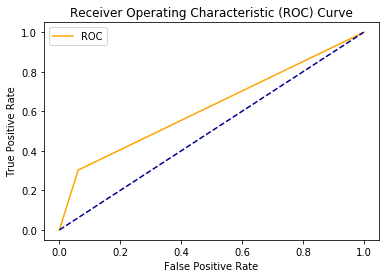

In [16]:
auc = roc_auc_score(Y_test,pred_labels)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(Y_test,pred_labels)
plot_roc_curve(fpr, tpr)